# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# Change "" to the actual file path within the dataset.
# A common file name for this dataset might be 'heart.csv'.
file_path = "heart.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "fedesoriano/heart-failure-prediction",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-4-c3cbc2b620de>:12: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### See Dataset as table

In [5]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


###Checking dataset quality

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Check Dupiclate

In [7]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
913,False
914,False
915,False
916,False


### Check null value

In [8]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


### Checking numeric and categorical data

In [12]:
numerical_features_eda = df.select_dtypes(include=np.number).columns.tolist()
categorical_features_eda = df.select_dtypes(include='object').columns.tolist()

### Distribution plot


--- Univariate Analysis: Numerical Features (Histograms) ---


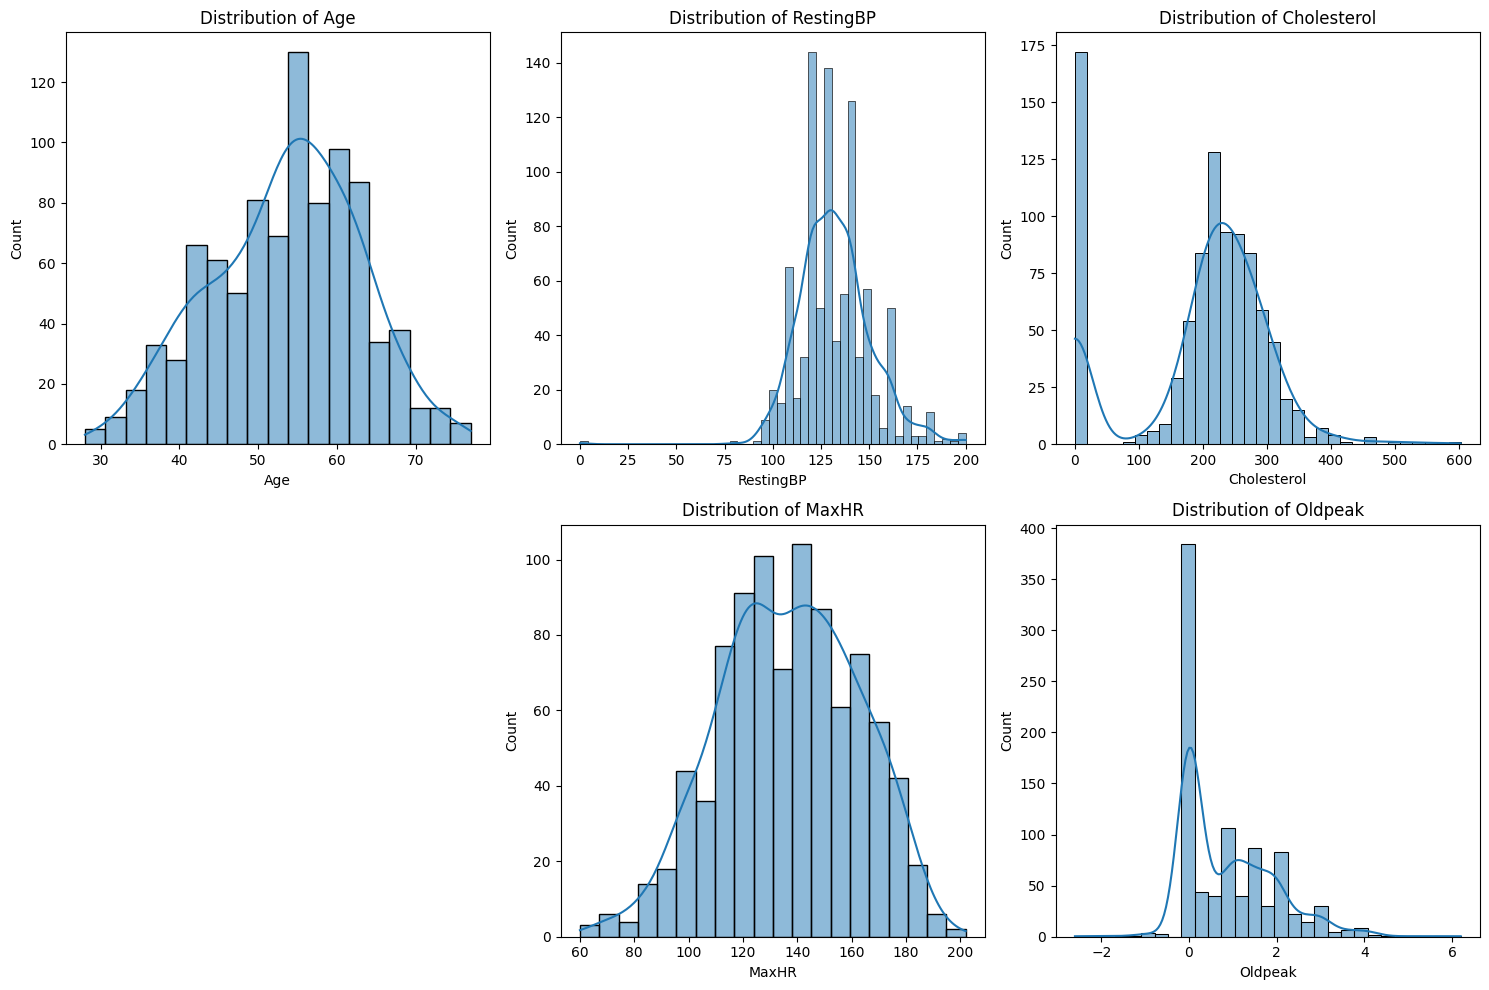

In [13]:
# Target variable for EDA
target_variable_eda = 'HeartDisease'

# 5. Univariate Analysis

# Numerical Features - Histograms
print("\n--- Univariate Analysis: Numerical Features (Histograms) ---")
plt.figure(figsize=(15, 10))
for i, col in enumerate([f for f in numerical_features_eda if f != target_variable_eda]):
    if col in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']: # Focus on true continuous/discrete numerical
        plt.subplot(2, 3, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()
# Observation: RestingBP and Cholesterol have 0 values, which are likely erroneous/placeholders.


Cholestrol and Resting Bp should not be 0. Need to delete for better EDA

In [17]:
df = df[~((df['Cholesterol'] == 0) | (df['RestingBP'] == 0))]

### Box plot

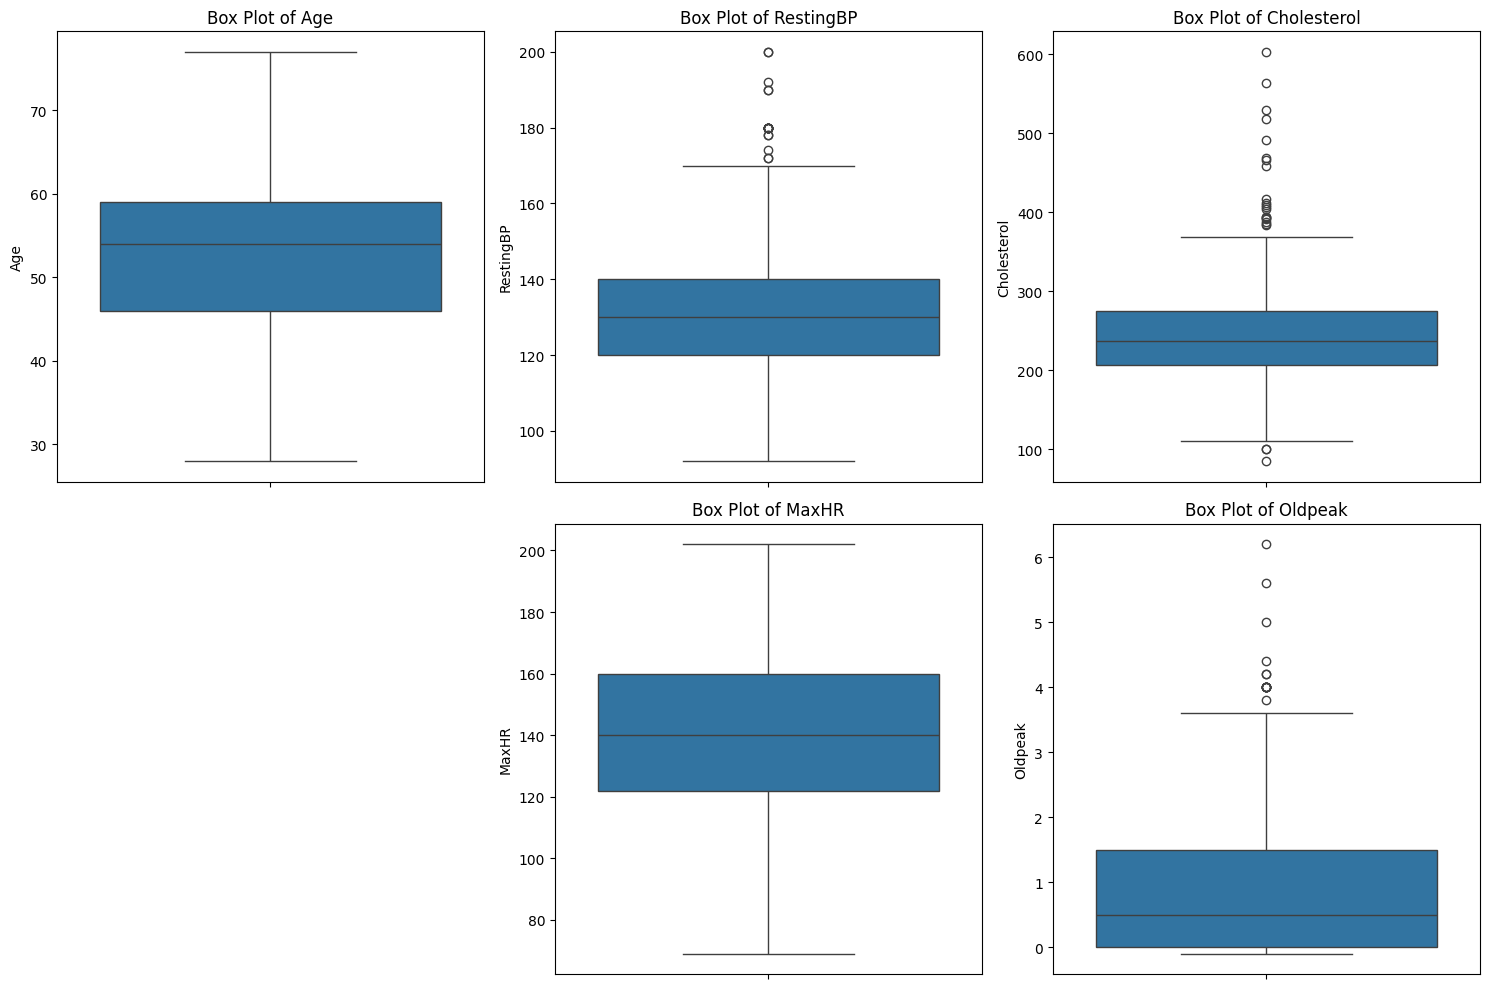

In [18]:
plt.figure(figsize=(15, 10))
for i, col in enumerate([f for f in numerical_features_eda if f != target_variable_eda]):
     if col in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']:
        plt.subplot(2, 3, i + 1)
        sns.boxplot(y=df[col])
        plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

### Visualizing Categorical Data

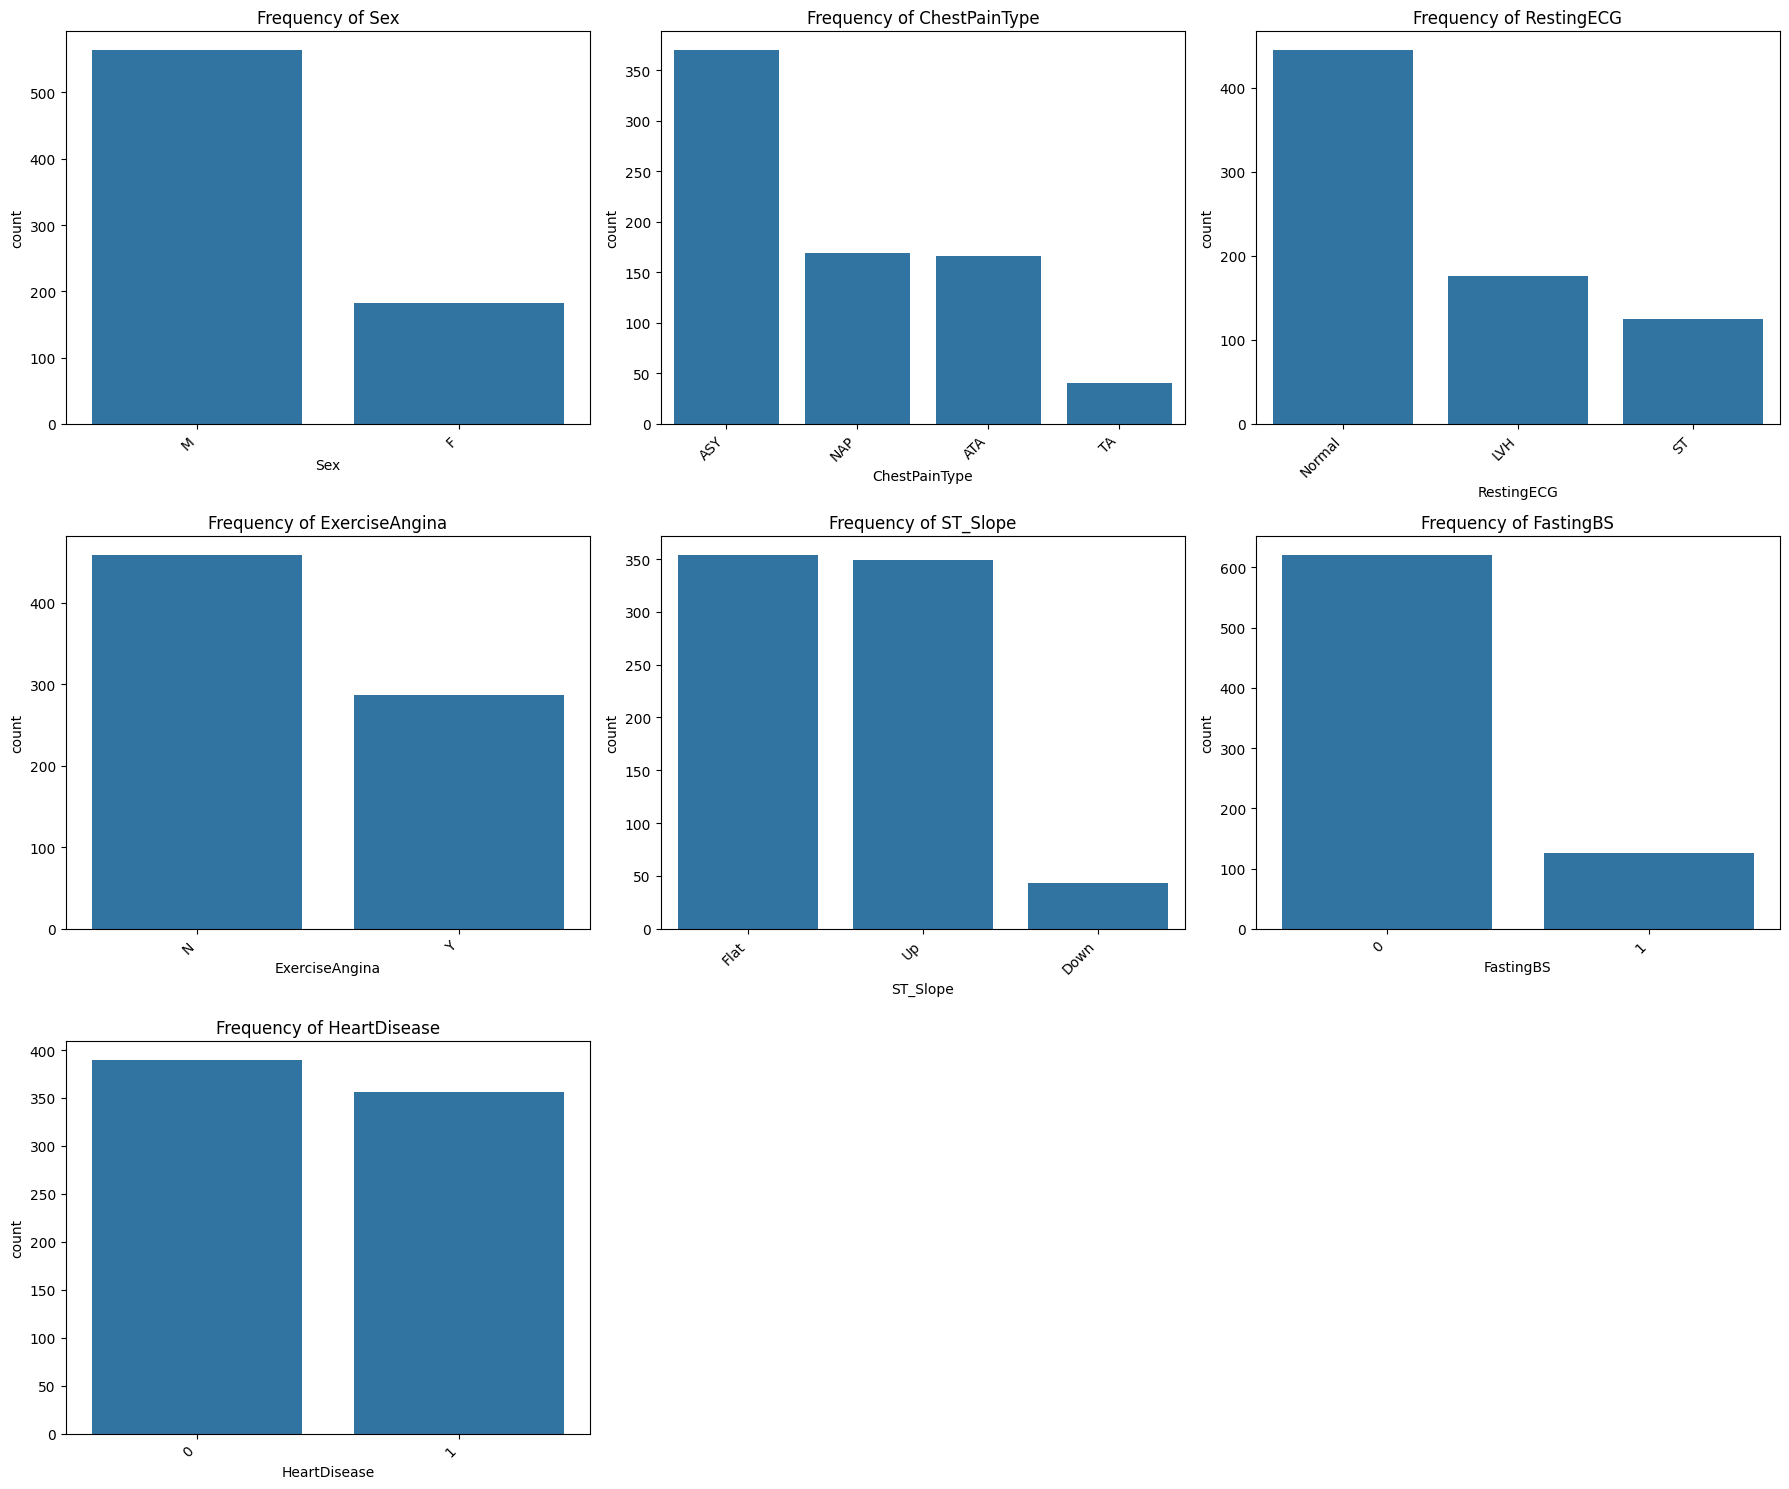

In [19]:
# Includes 'FastingBS' and 'HeartDisease' for EDA visualization
combined_categorical_for_eda_plot = categorical_features_eda + ['FastingBS', 'HeartDisease']
n_cols_cat = 3
n_rows_cat = (len(combined_categorical_for_eda_plot) + n_cols_cat - 1) // n_cols_cat
plt.figure(figsize=(18, n_rows_cat * 5))
for i, col in enumerate(combined_categorical_for_eda_plot):
    plt.subplot(n_rows_cat, n_cols_cat, i + 1)
    sns.countplot(x=df[col].astype(str), order=df[col].astype(str).value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Numerical Features vs. Target (HeartDisease)


--- Bivariate Analysis: Numerical Features vs. HeartDisease ---


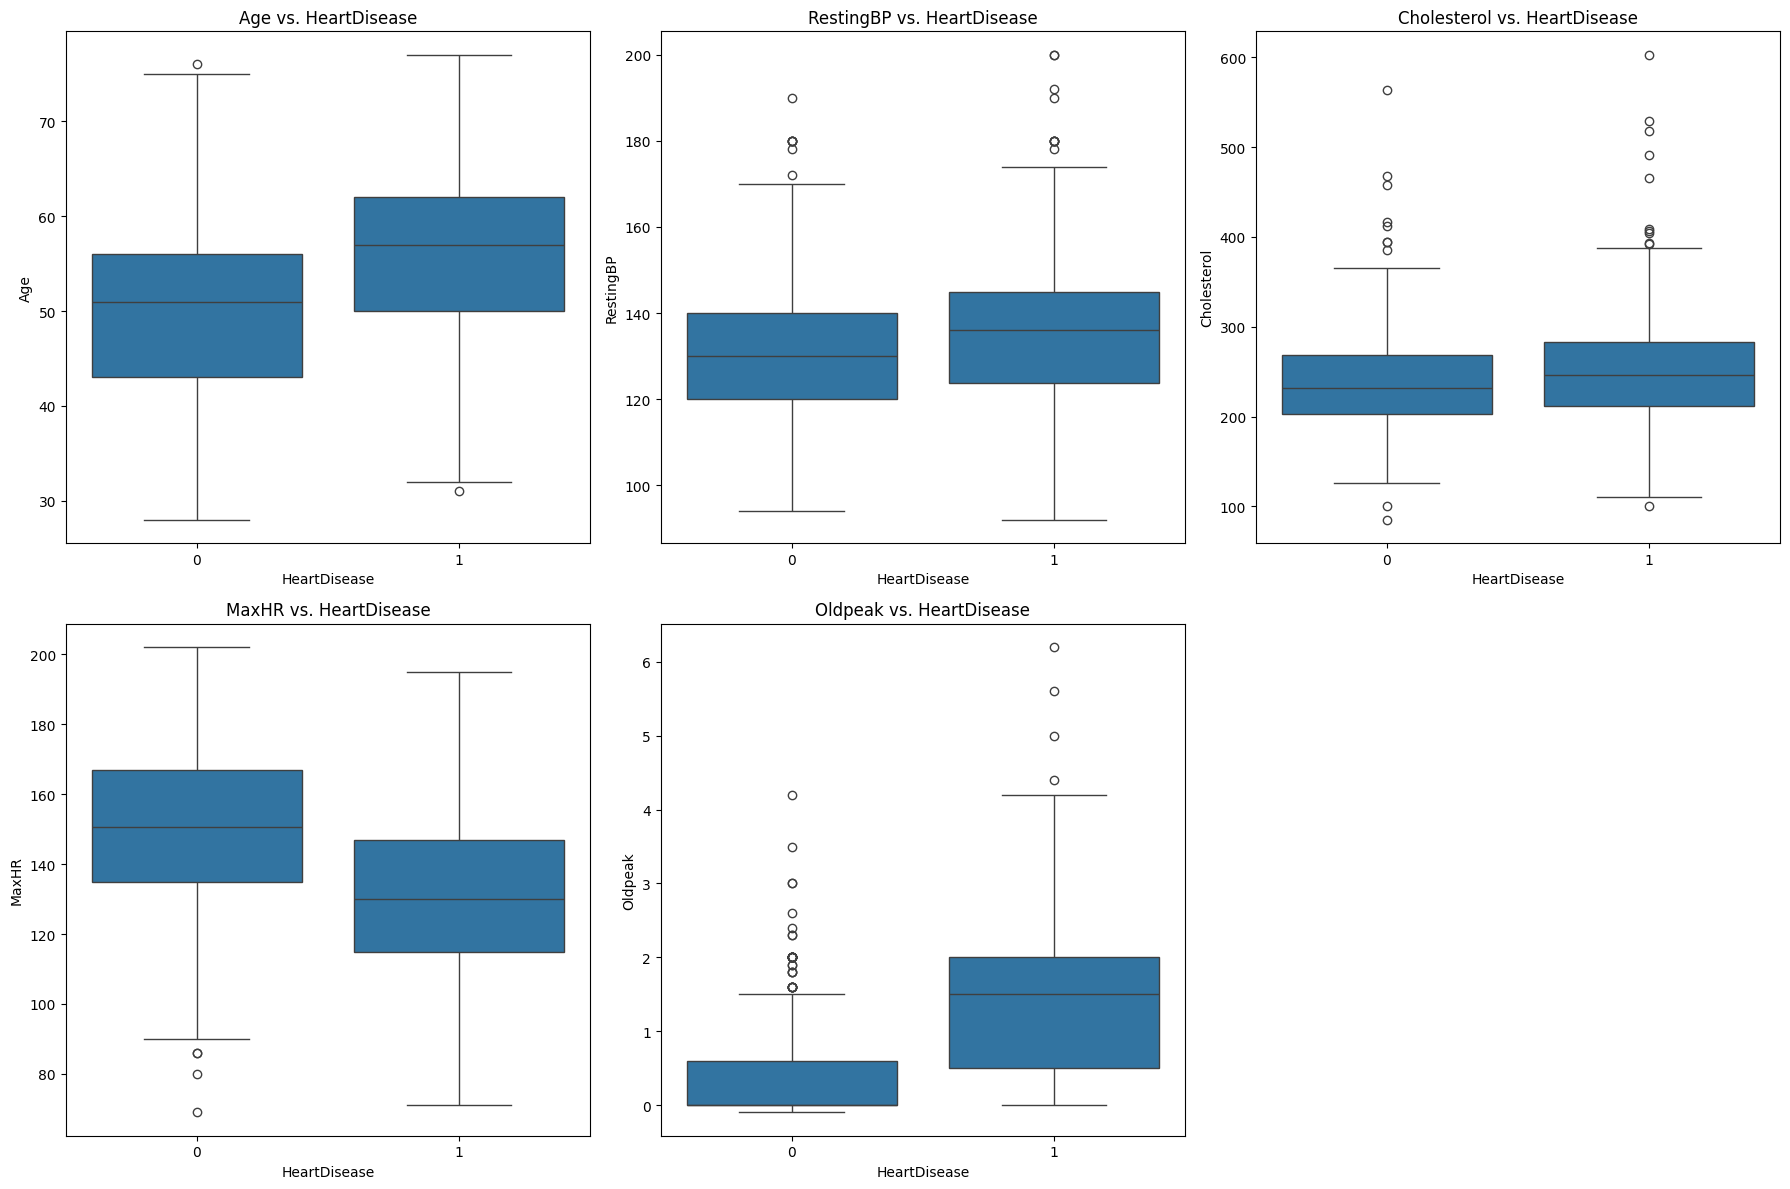

In [20]:
plt.figure(figsize=(18, 12))
true_numerical_for_bivariate = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for i, col in enumerate(true_numerical_for_bivariate):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=target_variable_eda, y=col, data=df)
    plt.title(f'{col} vs. {target_variable_eda}')
plt.tight_layout()
plt.show()

### Bivariate Analysis: Categorical Features vs. HeartDisease

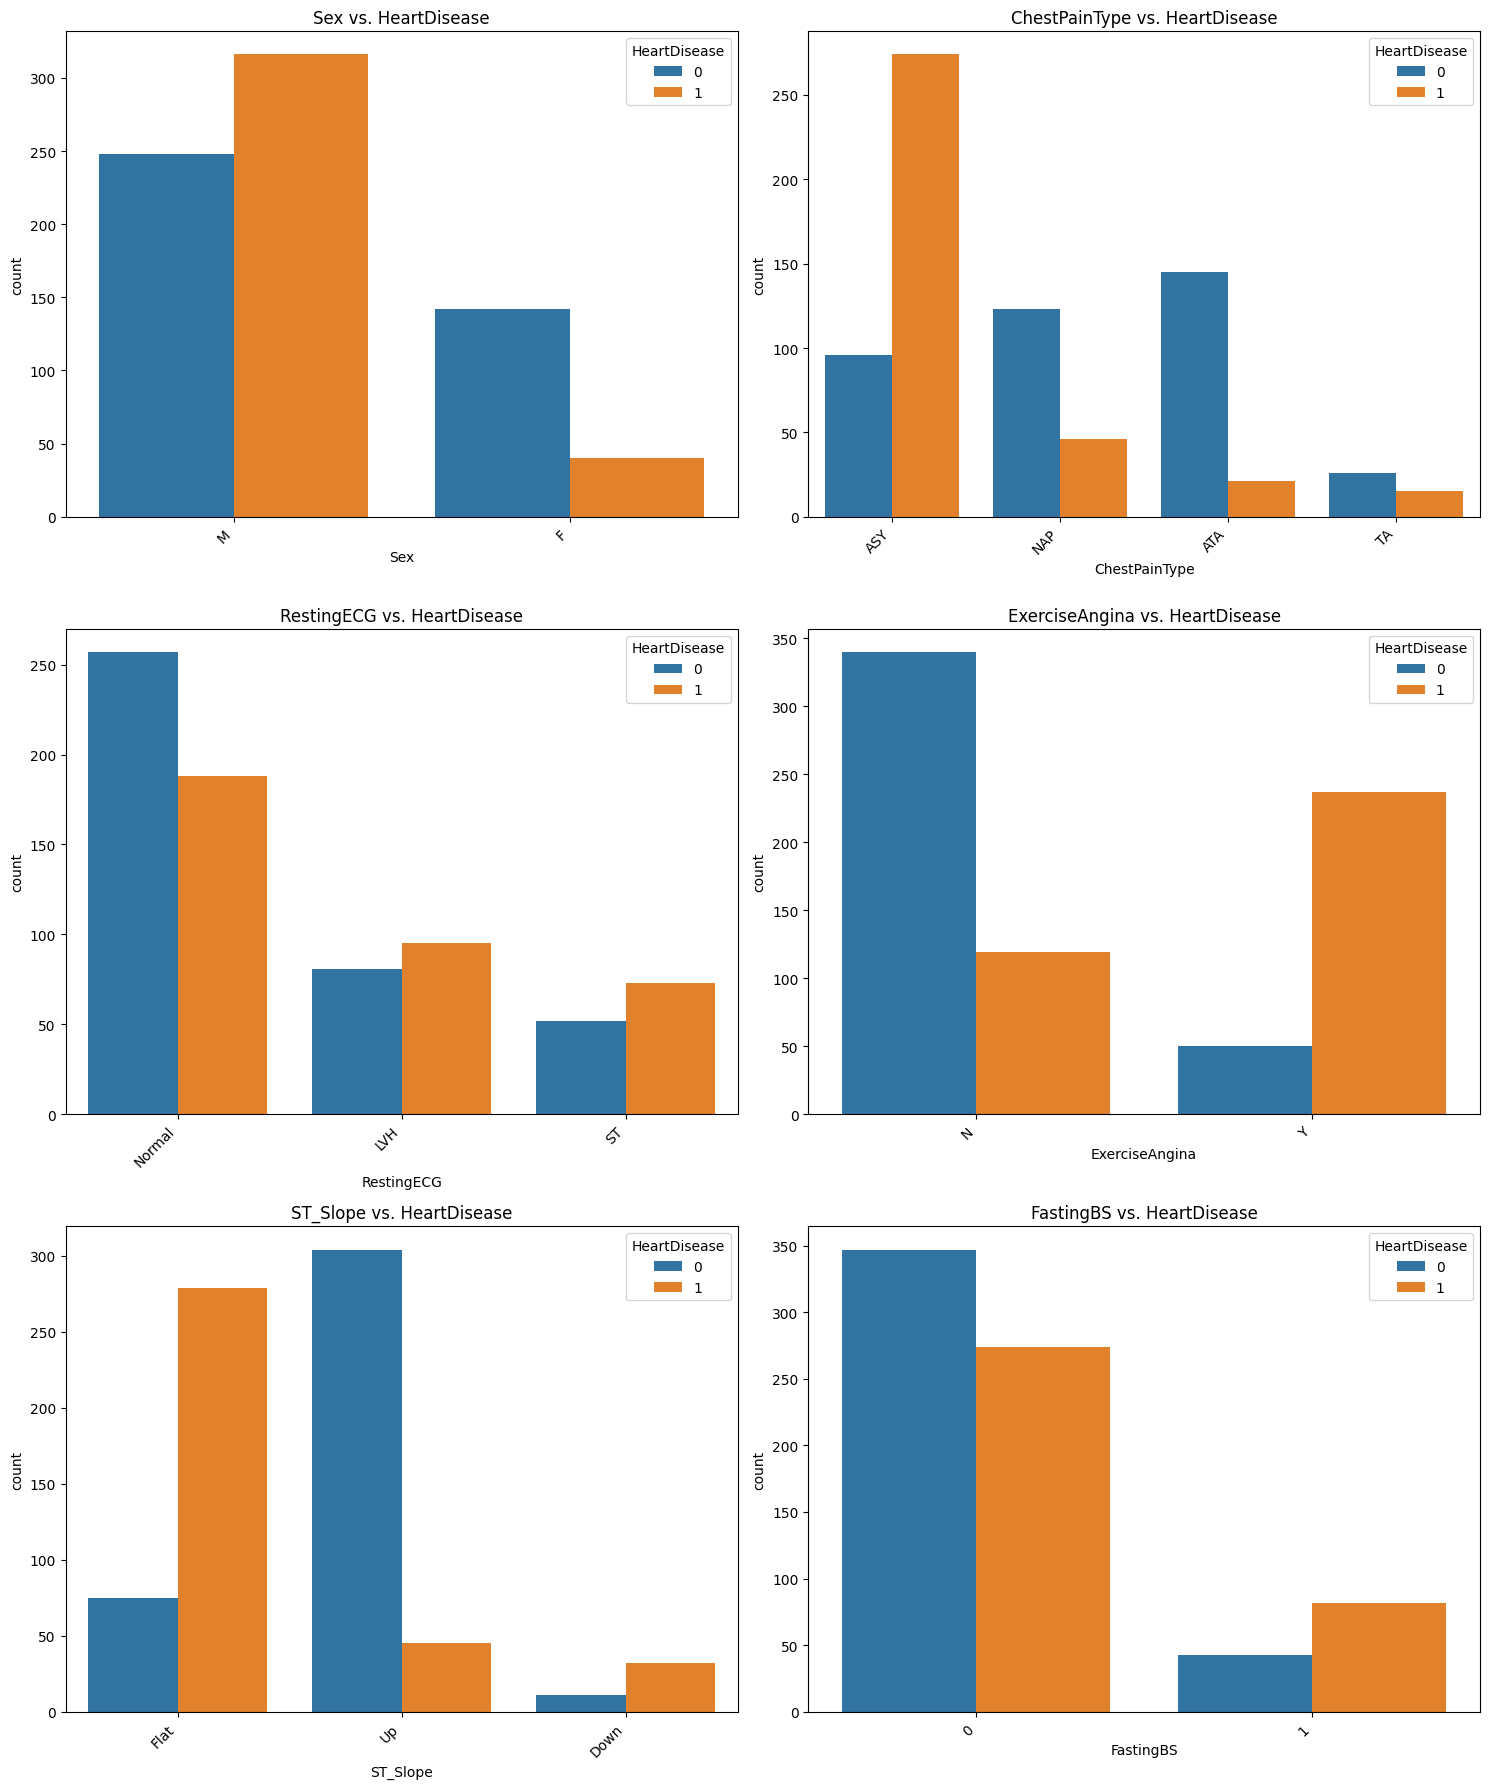

In [21]:
categorical_for_bivariate_plot = categorical_features_eda + ['FastingBS']
n_cols_biv_cat = 2
n_rows_biv_cat = (len(categorical_for_bivariate_plot) + n_cols_biv_cat - 1) // n_cols_biv_cat
plt.figure(figsize=(15, n_rows_biv_cat * 6))
for i, col in enumerate(categorical_for_bivariate_plot):
    plt.subplot(n_rows_biv_cat, n_cols_biv_cat, i + 1)
    sns.countplot(x=df[col].astype(str), hue=df[target_variable_eda].astype(str), data=df, order=df[col].astype(str).value_counts().index)
    plt.title(f'{col} vs. {target_variable_eda}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Bivariate Analysis: Correlation Heatmap

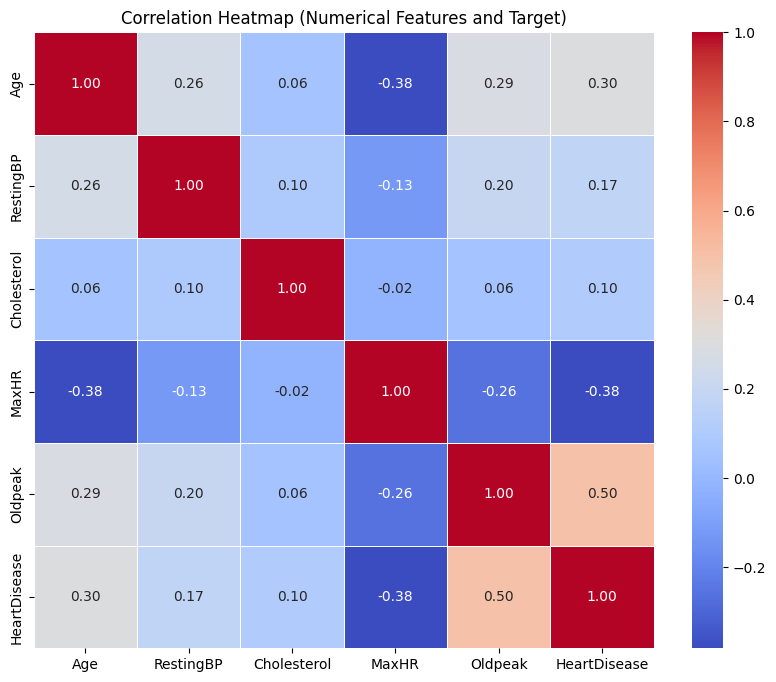

In [22]:
corr_features = true_numerical_for_bivariate + [target_variable_eda]
correlation_matrix = df[corr_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap (Numerical Features and Target)')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

### Delete 0 values from Cholestrol and RestingBP

In [37]:
df_prep = df.copy()

In [38]:
df_prep = df_prep[~((df['Cholesterol'] == 0) | (df_prep['RestingBP'] == 0))]

### Data Encoding

In [39]:
label_cols = ['Sex', 'ExerciseAngina']
one_hot_encode_cols = ['ChestPainType', 'RestingECG', 'ST_Slope']

In [40]:
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_prep[col] = le.fit_transform(df_prep[col])
    label_encoders[col] = le  # Save encoder for inverse_transform if needed

In [41]:
df_prep = pd.get_dummies(df_prep, columns=one_hot_encode_cols)

In [42]:
df_prep

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,False,True,False,False,False,True,False,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,False,False,False,True,False,True,False,False,True,False
914,68,1,144,193,1,141,0,3.4,1,True,False,False,False,False,True,False,False,True,False
915,57,1,130,131,0,115,1,1.2,1,True,False,False,False,False,True,False,False,True,False
916,57,0,130,236,0,174,0,0.0,1,False,True,False,False,True,False,False,False,True,False


### Delete outlier

In [43]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    return outliers_indices

# Define columns where you want to detect and remove outliers
outlier_cols = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Remove outliers using IQR for each specified column
for col in outlier_cols:
    outlier_indices = detect_outliers_iqr(df_prep, col)
    df_prep = df_prep.drop(outlier_indices)
    print(f"Removed {len(outlier_indices)} outliers from {col}")

print("\nShape of the dataframe after outlier removal:", df_prep.shape)

Removed 20 outliers from RestingBP
Removed 22 outliers from Cholesterol
Removed 0 outliers from MaxHR
Removed 12 outliers from Oldpeak

Shape of the dataframe after outlier removal: (692, 19)
